# Final Project

**Zabryna Lynn Balen**

Loading in the packages to be used:

In [2]:
library('tidyverse')
library('readxl')
library('ggrepel')

options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


The following data set provides information on companies who have supported anti-LGBTQ+ politicians, the amount they have contributed to those politicians, and the number of states where those contributions have been made. Additionally, it provides information about whether these companies have donated to pride events and have a pledge supporting LGBTQ+ individuals via the Human Rights Campaign Business Pledge. The code below loads in data from Tidy Tuesday:

In [5]:
df_pride1 = df_pride |>
    count(HRCpledge)

df_pride1 |> head()

HRCpledge,n
<lgl>,<int>
FALSE,110
TRUE,15


In [3]:
df_pride = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-06-07/static_list.csv',
                   col_types = cols())

df_pride = df_pride |> na.omit()
df_pride

Company,Pride?,HRC Business Pledge,Amount Contributed Across States,# of Politicians Contributed to,# of States Where Contributions Made
<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
Toyota,TRUE,FALSE,601500.0,7,3
AT&T,TRUE,TRUE,307137.5,67,6
Charter Communications,FALSE,FALSE,168077.1,34,5
Enterprise Products Partners,FALSE,FALSE,160000.0,1,1
Comcast,TRUE,FALSE,121350.0,40,4
Berkshire Hathaway,FALSE,FALSE,100000.0,1,1
Valero Energy,FALSE,FALSE,93500.0,6,2
Amazon,TRUE,TRUE,87900.0,17,1
FedEx,TRUE,FALSE,79700.0,24,2


In [6]:
df_pride1 = df_pride |>
    count(sponsor_pride)

df_pride1 |> head()

sponsor_pride,n
<lgl>,<int>
FALSE,95
TRUE,30


In [4]:
df_pride = df_pride |> 
    rename(sponsor_pride = `Pride?`, 
           HRCpledge = `HRC Business Pledge`,
           antiLGBT_donate = `Amount Contributed Across States`,
           num_politicians = `# of Politicians Contributed to`,
           num_states = `# of States Where Contributions Made`)


df_pride |> head()

Company,sponsor_pride,HRCpledge,antiLGBT_donate,num_politicians,num_states
<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
Toyota,TRUE,FALSE,601500.0,7,3
AT&T,TRUE,TRUE,307137.5,67,6
Charter Communications,FALSE,FALSE,168077.1,34,5
Enterprise Products Partners,FALSE,FALSE,160000.0,1,1
Comcast,TRUE,FALSE,121350.0,40,4
Berkshire Hathaway,FALSE,FALSE,100000.0,1,1


In [7]:
df_pride1 = df_pride |>
    group_by(sponsor_pride) |>
    top_n(n = 1, wt = antiLGBT_donate)

df_pride1

Company,sponsor_pride,HRCpledge,antiLGBT_donate,num_politicians,num_states
<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
Toyota,TRUE,FALSE,601500.0,7,3
Charter Communications,FALSE,FALSE,168077.1,34,5


### Boxplot

The following box plot showcases the distribution of the amount companies have donated to anti-LGBTQ politicians. Additionally, it stratifies these companies by those that have donated to Pride events and those that have not. This stratification is done to highlight the opposing actions that some companies have taken, wherein there are companies that try to create the image that they are supportive (i.e., donate to pride events) but simultaneously contribute to anti-LGBTQ politicians, highlighting their true  views and values. The code first plots the amount donated to anti-LGBTQ+ politicians on the x axis, and separates the data into two boxplots on the y axis as those that have supported pride and those that have not. Additionally, the code plots the individual companies as points on the graph, again separated by companies supporting pride and companies not supporting pride. The code provides some adjustment for plot appearance, including jitter-ing the points so that they are more viewable, adding labels, ensuring that the x axis is reported in dollars, and labeling the companies who have donated more thatn $100,000 to anti-LGBTQ politicians. Together, the boxplot shows that there are 30 companies who have donated to both pride events and anti-LGBTQ+ politicians and that the highest donors to anti-LGBTQ+ organizations (Toyota and AT&T) belong to this group.  

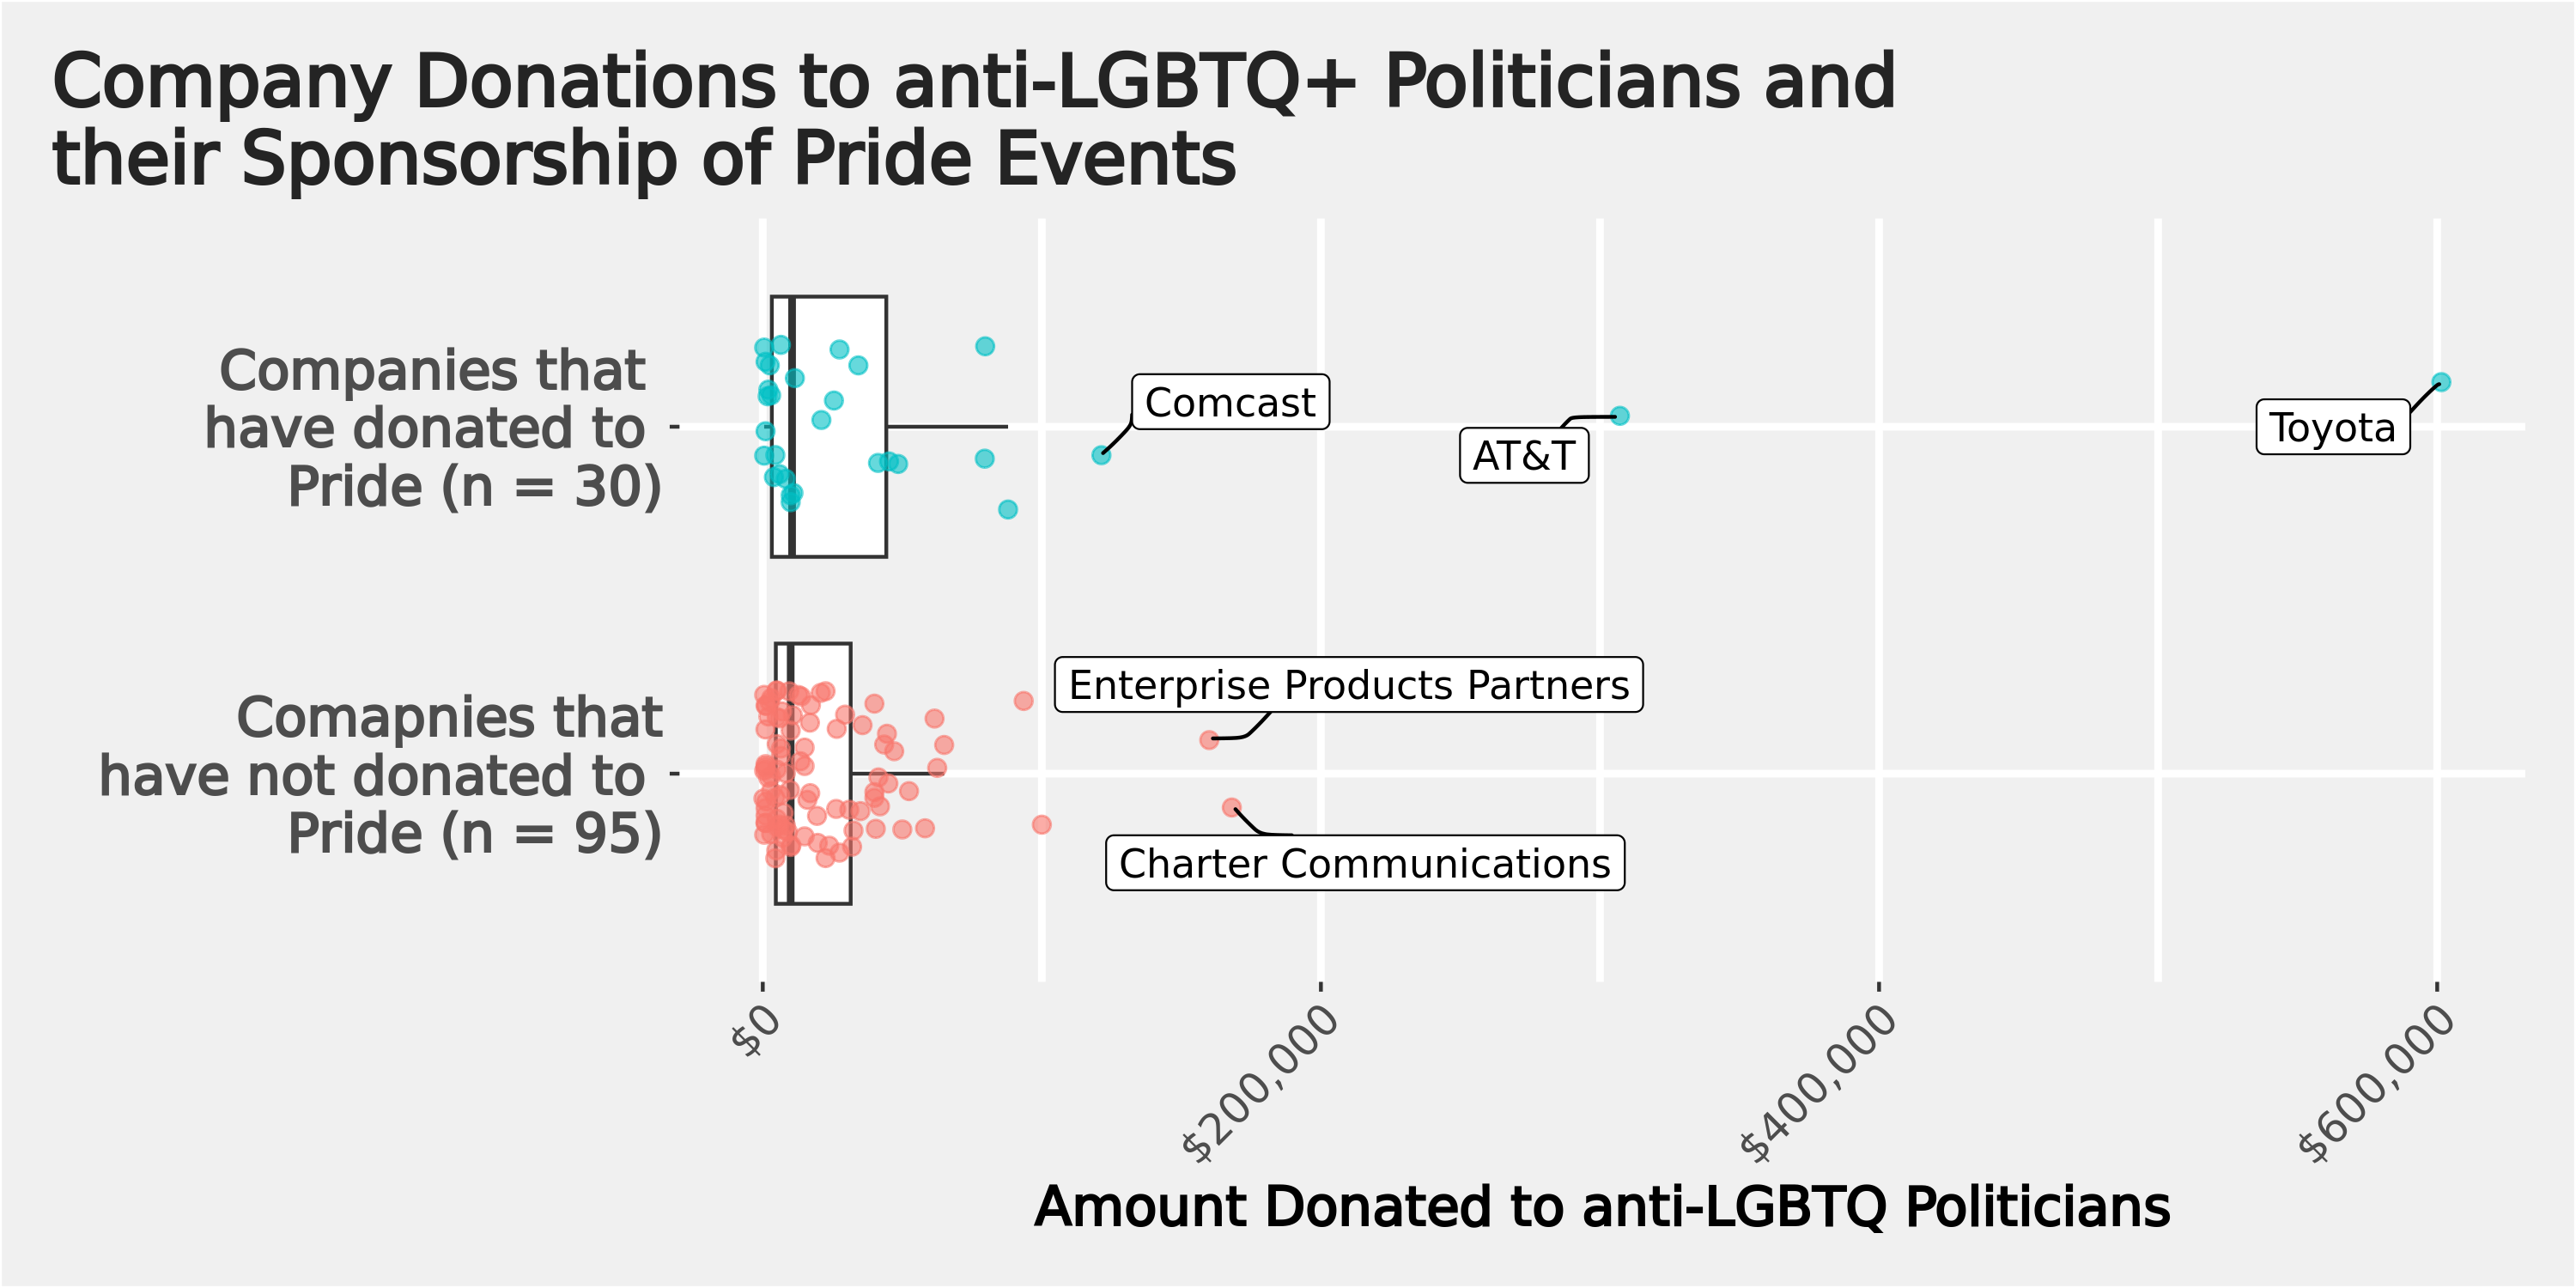

In [8]:
options(repr.plot.width=10, repr.plot.height=5)

pos <- position_jitter(height = 0.25, seed = 2)

bg = '#f0f0f0'

p1 = ggplot(df_pride, aes(y = sponsor_pride, x = antiLGBT_donate)) +
    geom_boxplot(outlier.shape = NA) +
    geom_point(aes(color = sponsor_pride), 
               position = pos, 
               alpha = 0.6, size = 2) +
    scale_y_discrete(labels=c("Comapnies that
have not donated to 
Pride (n = 95)", "Companies that 
have donated to 
Pride (n = 30)")) +
    scale_x_continuous(labels = scales::dollar_format()) +
    theme(plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm"),
          axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
          axis.text.y = element_text(face = 'bold', size = 15),
          plot.title = element_text(color = '#242424', face = 'bold', size = 20),
          plot.title.position = 'plot',
          axis.title.x = element_text(face = 'bold', size = 15),
          plot.background = element_rect(fill = bg),
          panel.background = element_rect(fill = bg),
          panel.grid.major = element_line(linewidth = 1),
          panel.grid.minor = element_line(linewidth = 1),
          legend.position = 'none') +
    labs(x = "Amount Donated to anti-LGBTQ Politicians", y = "", 
         title = "Company Donations to anti-LGBTQ+ Politicians and 
their Sponsorship of Pride Events") +
    # geom_text(aes(label=ifelse(antiLGBT_donate>100000,as.character(Company),'')),nudge_x=0.45, nudge_y=0.05)
    geom_label_repel(aes(label=ifelse(antiLGBT_donate>100000,as.character(Company),'')), 
            position = pos,    
            # nudge_x = .15,
            box.padding = 0.5,
            # nudge_y = 0.5,
            segment.curvature = -0.1,
            segment.ncp = 3,
            segment.angle = 20,
            max.overlaps = Inf)

p1

### Bar Chart

The following bar chart plots the top 10 companies who have donated to anti-LGBTQ+ politicians but simultanesouly have a Human Rights Campaign (HRC) Business pledge (i.e., a pledge supporting an LGBTQ+ inclusive environment in their company), again highlighting this discrepancy of alleged support for LGBTQ+ people. The code below first creates a new data frame of only those with an HRC business pledge and the top 10 rows with the highest donations within those that have a pledge. The bar chart then plots these top 10 companies on the y axis and the amount donated to anti-LGBTQ politicians on the x-axis. The code applies several feature to adjust the appearance including, reordering the bars from smallest amount donated to the most (top to bottom on the graph), creating labels, adjusting the x axis to display in dollars, and labeling each bar with the amount donated to anti-LGBTQ politicians per company. Together, the bar chart shows that AT&T has donated the most money to anti-LGBTQ+ politicians in the amount of `$307,137` while also holding an HRC business pledge. This is about 3.5 times as much as the next company in this group, Amazon who has donated `$87,900` to anti-LGBTQ politicians, while having an HRC pledge.   

In [9]:
df_pride2 = df_pride |>
    filter(HRCpledge == TRUE) |>
    top_n(n = 10, wt = antiLGBT_donate)
    # fct_rev(fct_reorder(group, value))

df_pride2

Company,sponsor_pride,HRCpledge,antiLGBT_donate,num_politicians,num_states
<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
AT&T,TRUE,TRUE,307137.5,67,6
Amazon,TRUE,TRUE,87900.0,17,1
Union Pacific,FALSE,TRUE,52400.0,6,3
General Motors,TRUE,TRUE,48500.0,10,4
Pfizer,FALSE,TRUE,41450.0,20,5
Wells Fargo,FALSE,TRUE,40500.0,4,2
CVS Health,FALSE,TRUE,35750.0,11,3
Merck,FALSE,TRUE,26300.0,22,3
PepsiCo,FALSE,TRUE,6250.0,7,2


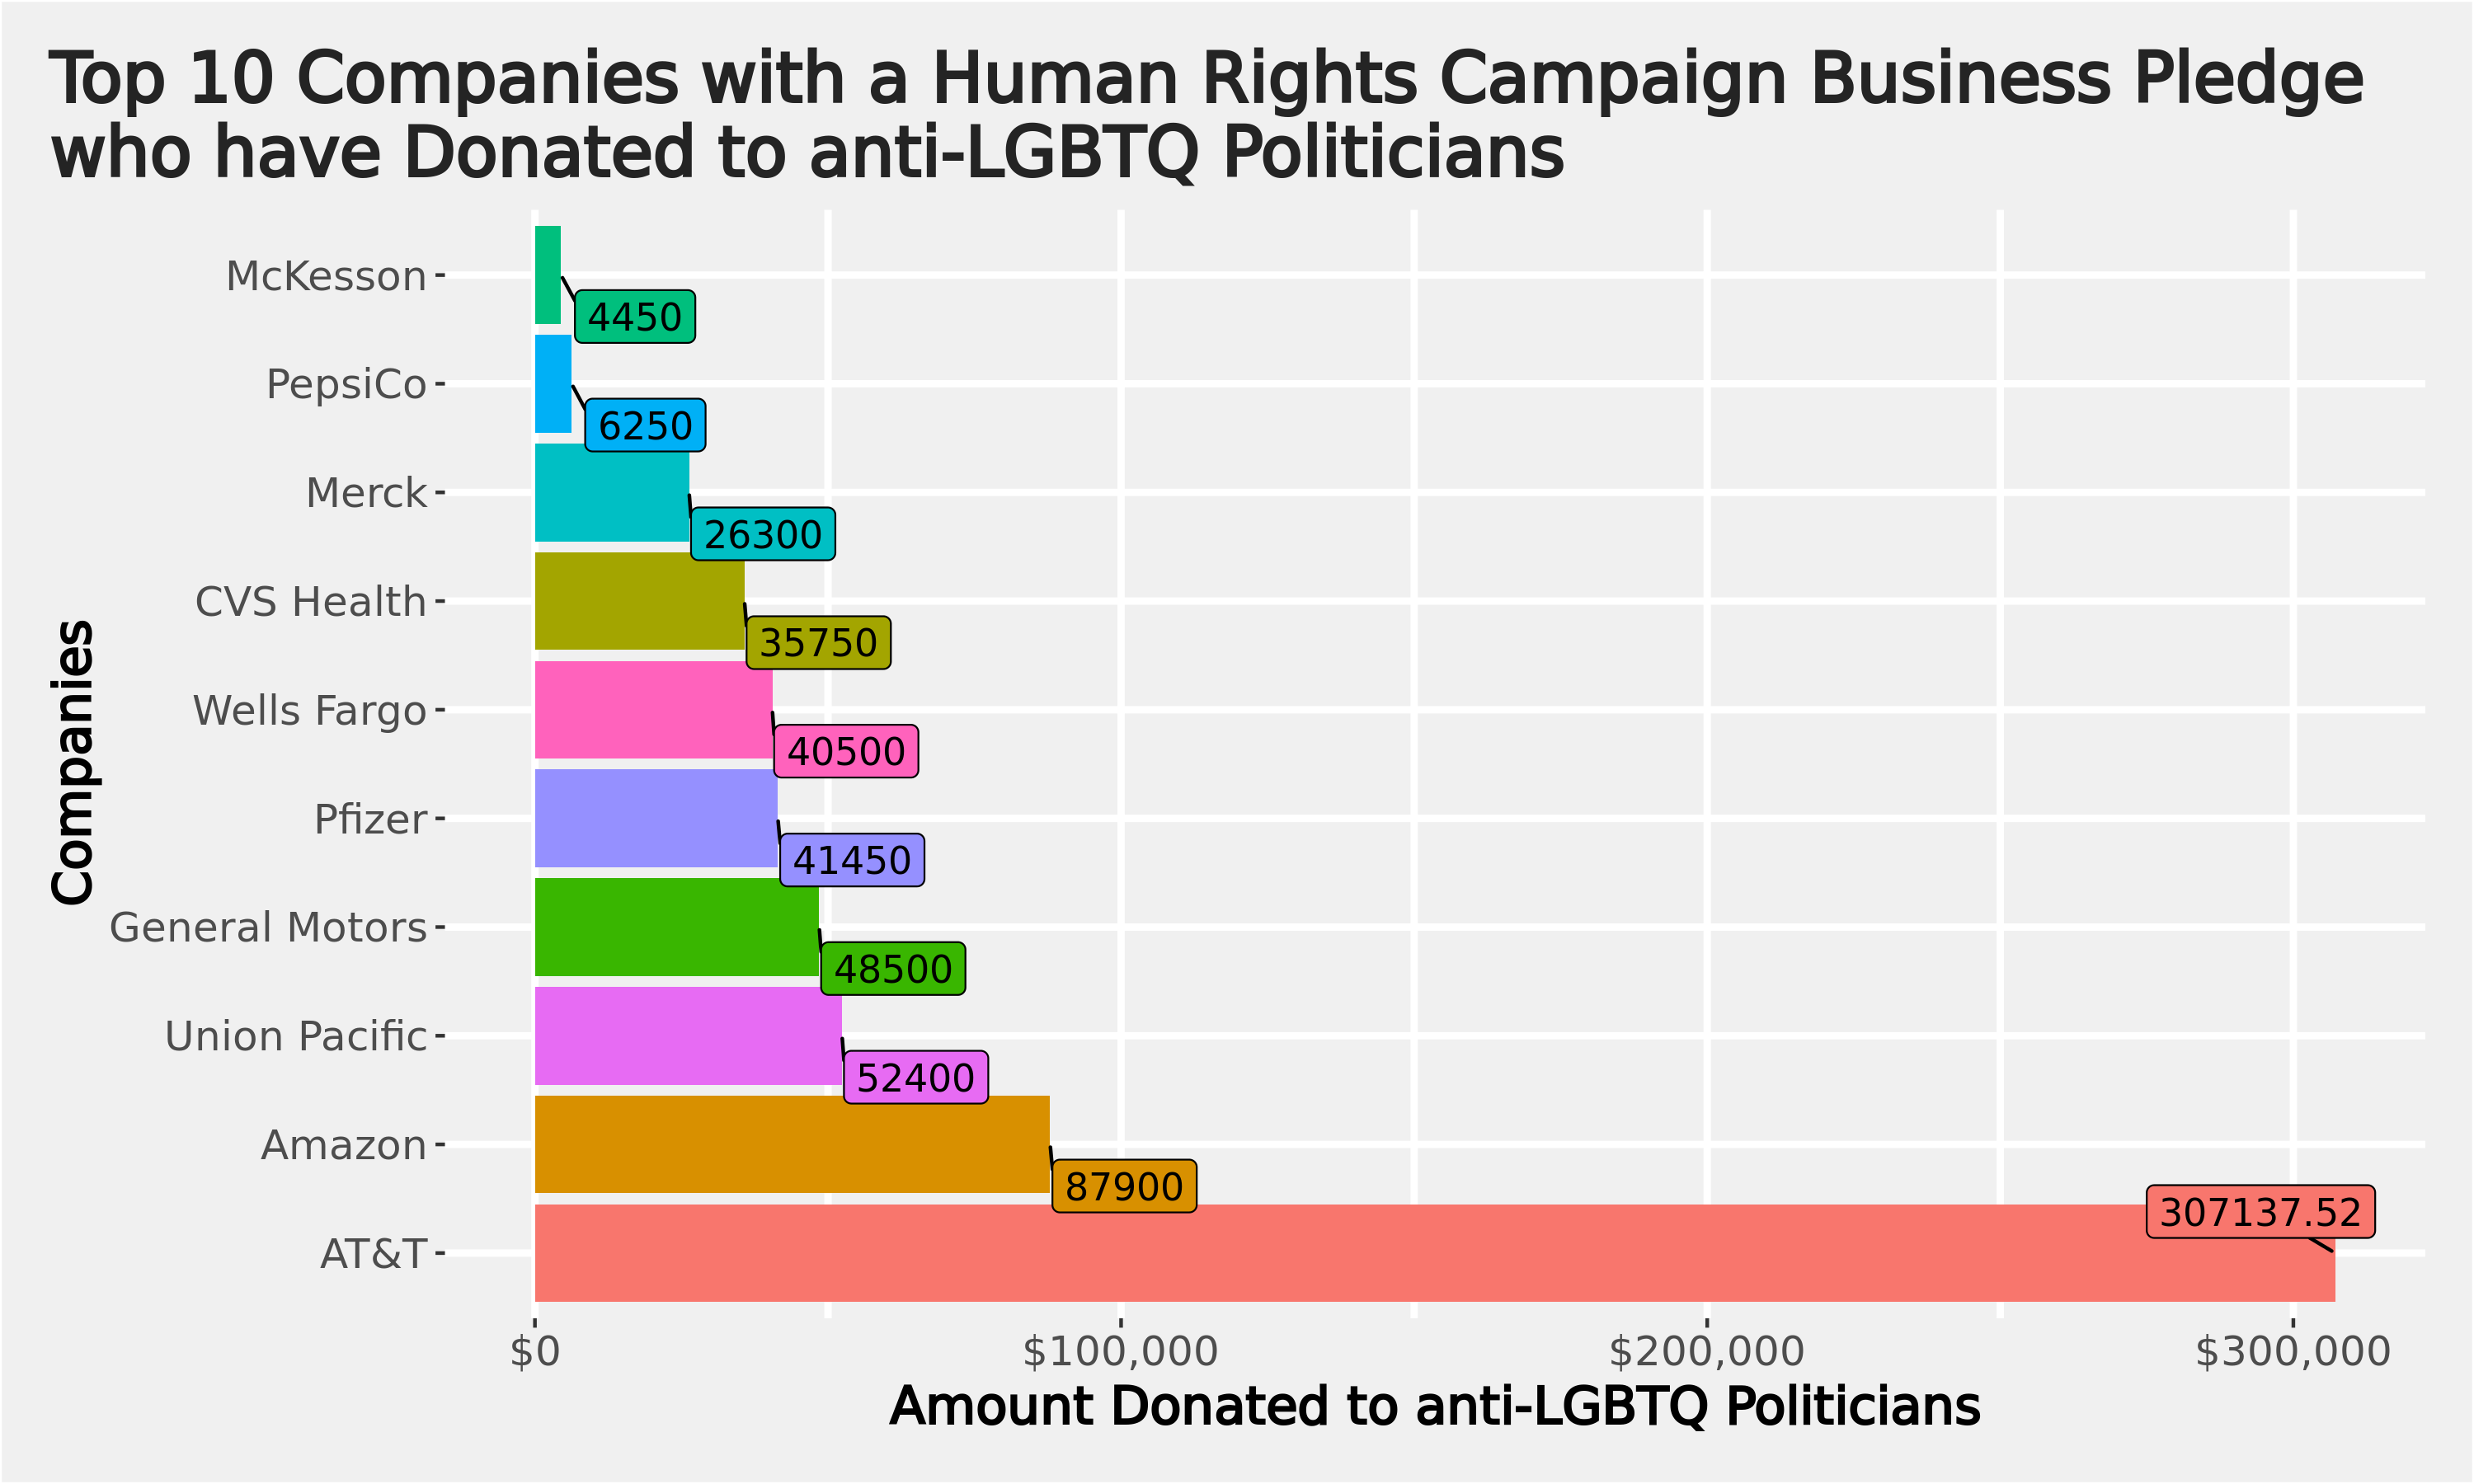

In [15]:
p2 = ggplot(df_pride2, aes(x = antiLGBT_donate, 
                           y = fct_rev(fct_reorder(Company, antiLGBT_donate)), 
                           fill = Company)) +
    geom_col() +
    stat_summary(
    aes(label = after_stat(x)), 
    fun = "max",
    geom = "label_repel",
    min.segment.length = 0, # always draw segments
    position = position_nudge_repel(x = 15, y = 0)
  ) +
    scale_x_continuous(labels = scales::dollar_format())+
    theme(plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm"),
          axis.text.x = element_text(size = 12),
          axis.text.y = element_text(size = 12),
          plot.title = element_text(color = '#242424', face = 'bold', size = 20),
          plot.title.position = 'plot',
          axis.title.x = element_text(face = 'bold', size = 15),
          axis.title.y = element_text(face = 'bold', size = 15),
          plot.background = element_rect(fill = bg),
          panel.background = element_rect(fill = bg),
          panel.grid.major = element_line(linewidth = 1),
          panel.grid.minor = element_line(linewidth = 1),
          legend.position = 'none') +
    labs(x = "Amount Donated to anti-LGBTQ Politicians", y = "Companies", 
         title = "Top 10 Companies with a Human Rights Campaign Business Pledge
who have Donated to anti-LGBTQ Politicians") 
            
p2

### Scatter Plot

The following scatter plot displays the relationship between the amount donated per anti-LGBTQ+ politician by the total amount donated to anti-LGBTQ+ politicians for companies in this data set. To do this, the code shows how first a new data frame was created that added a column calculating the total amount donated to anti-LGBTQ politicians divided by the number of politicians. This new data frame was used to form the plot, wherein the amount per politician was plotted on the x-axis and the total amount was ploted on the y axis. Additionally, the plot highlights the companies who have and have not donated to pride campaigns using the color of the dots. The code also graphs a linear model trend line for both of these groups (those that have donated to pride and those that haven't). The code adjust for appearance by adding axes labels and labels for the comapnies who have either donated a total of more than `$100,000` to anti-LGBTQ politicians or more than `$25,000` per anti-LGBTQ politician. Overall, the plot shows that companies who have supported Pride events have donated less per anti-LGBT politician but more in total, while companies who have not supported pride have donated more per anti-LGBTQ politician but less in total. 

In [11]:
df_pride3 = df_pride |>
    mutate(donate_per_politician = antiLGBT_donate/num_politicians)

df_pride3 |> head()

Company,sponsor_pride,HRCpledge,antiLGBT_donate,num_politicians,num_states,donate_per_politician
<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
Toyota,TRUE,FALSE,601500.0,7,3,85928.571
AT&T,TRUE,TRUE,307137.5,67,6,4584.142
Charter Communications,FALSE,FALSE,168077.1,34,5,4943.446
Enterprise Products Partners,FALSE,FALSE,160000.0,1,1,160000.000
Comcast,TRUE,FALSE,121350.0,40,4,3033.750
Berkshire Hathaway,FALSE,FALSE,100000.0,1,1,100000.000


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


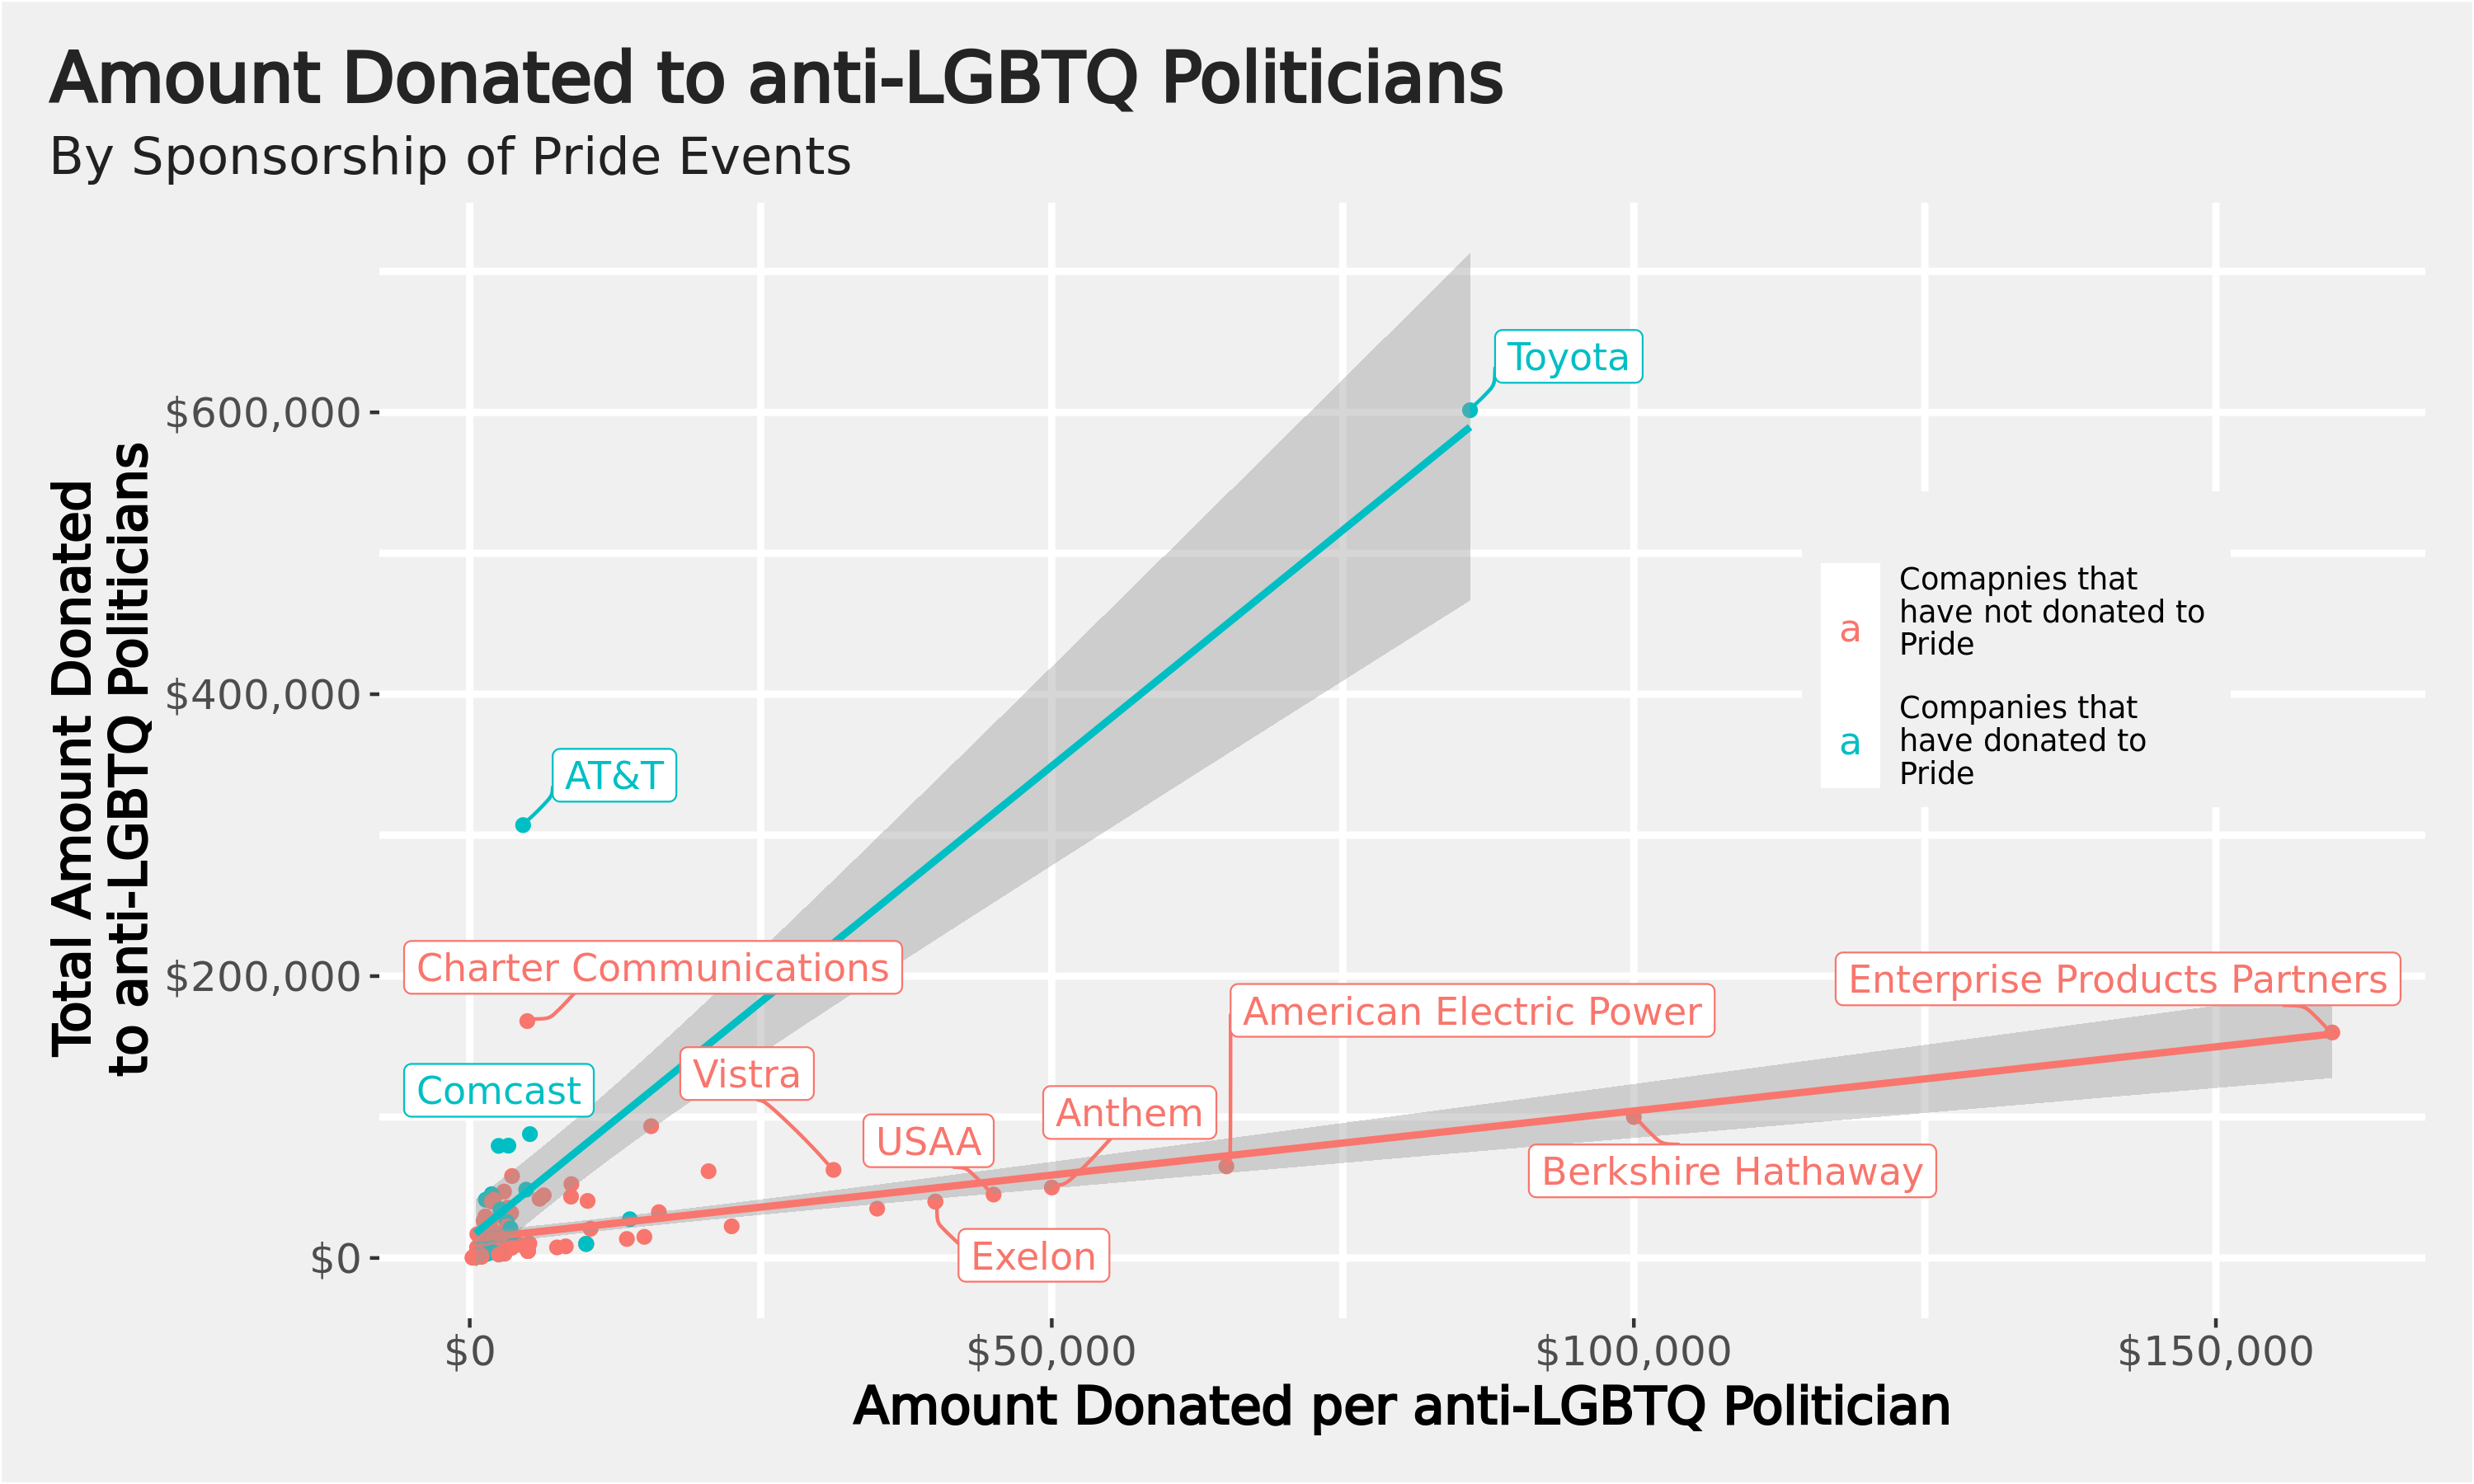

In [16]:
options(repr.plot.width=10, repr.plot.height=6)

p3 = ggplot(df_pride3, aes(x = donate_per_politician, y = antiLGBT_donate,
                          color = sponsor_pride)) +
     geom_point() +
     geom_smooth(method = 'lm') +
     scale_x_continuous(labels = scales::dollar_format()) +
     scale_y_continuous(labels = scales::dollar_format()) +
     theme(plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm"),
          axis.text.x = element_text(size = 12),
          axis.text.y = element_text(size = 12),
          plot.title = element_text(color = '#242424', face = 'bold', size = 20),
          plot.subtitle = element_text(color = '#212121', size = 15),
          plot.title.position = 'plot',
          axis.title.x = element_text(face = 'bold', size = 15),
          axis.title.y = element_text(face = 'bold', size = 15),
          plot.background = element_rect(fill = bg),
          panel.background = element_rect(fill = bg),
          panel.grid.major = element_line(linewidth = 1),
          panel.grid.minor = element_line(linewidth = 1),
          legend.position = c(0.8, 0.6),
          legend.direction = "vertical",
          legend.background = element_rect(fill = bg),
          legend.key = element_rect(fill = bg, color = NA)) +
    scale_color_discrete(name = "", labels = c("Comapnies that
have not donated to 
Pride
", "Companies that 
have donated to 
Pride")) +
    labs(x = "Amount Donated per anti-LGBTQ Politician", 
         y = "Total Amount Donated 
to anti-LGBTQ Politicians", 
         title = "Amount Donated to anti-LGBTQ Politicians", 
         subtitle = "By Sponsorship of Pride Events") +
    geom_label_repel(aes(label=ifelse(antiLGBT_donate>100000 | donate_per_politician >25000,as.character(Company),'')), 
            position = pos,    
            # nudge_x = .15,
            box.padding = 0.5,
            # nudge_y = 0.5,
            segment.curvature = -0.1,
            segment.ncp = 3,
            segment.angle = 20,
            max.overlaps = 11)

p3